# Plotting Time Series Data
<hr>

### Basics

In [1]:
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

%matplotlib inline

In [2]:
plt.style.use('seaborn')

dates = [
    datetime(2019, 5, 24),
    datetime(2019, 5, 25),
    datetime(2019, 5, 26),
    datetime(2019, 5, 27),
    datetime(2019, 5, 28),
    datetime(2019, 5, 29),
    datetime(2019, 5, 30)
]

y = [0, 1, 3, 4, 6, 5, 7]

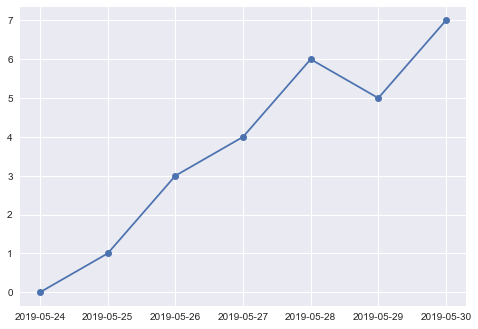

In [3]:
plt.plot_date(dates, y, ls='-')
plt.show()

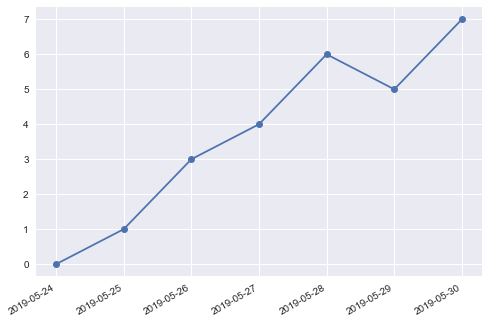

In [4]:
plt.plot_date(dates, y, ls='-')
plt.gcf().autofmt_xdate()
plt.show()

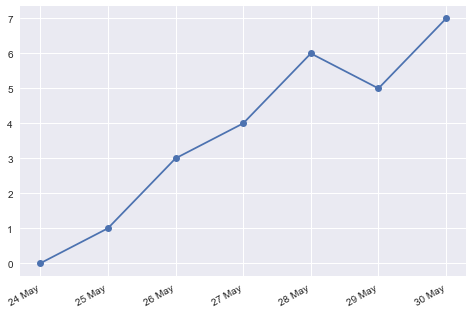

In [5]:
plt.plot_date(dates, y, ls='-')
plt.gcf().autofmt_xdate()  # gcf= get current fig
date_format = mpl_dates.DateFormatter('%d %b')
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()

### CSV

In [6]:
import pandas as pd

data = pd.read_csv('data (Part 8).csv')

# COnver date column from str->date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-18,7266.080078,8281.660156,7257.259766,8193.139648,8193.139648,723011166
1,2019-05-19,8193.139648,8193.139648,7591.850098,7998.290039,7998.290039,637617163
2,2019-05-20,7998.290039,8102.319824,7807.770020,7947.930176,7947.930176,357803946
3,2019-05-21,7947.930176,8033.759766,7533.660156,7626.890137,7626.890137,424501866
4,2019-05-22,7626.890137,7971.259766,7478.740234,7876.500000,7876.500000,386766321
5,2019-05-23,7876.500000,8165.450195,7801.569824,7996.399902,7996.399902,413162746
6,2019-05-24,7996.399902,8140.819824,7948.680176,8059.129883,8059.129883,179206342
7,2019-05-25,8059.129883,8779.000000,7894.529785,8726.230469,8726.230469,483663699
8,2019-05-26,8726.230469,8931.530273,8668.459961,8785.169922,8785.169922,507164714
9,2019-05-27,8785.169922,8818.709961,8562.200195,8718.849609,8718.849609,360752199


In [7]:
price_date = data['Date']
price_open = data['Open']
price_close = data['Close']

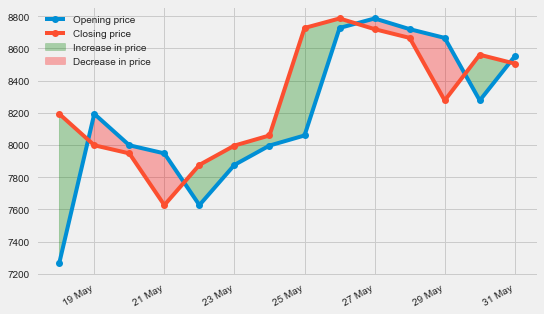

In [8]:
plt.style.use('fivethirtyeight')

plt.plot_date(price_date, price_open, ls='-', label='Opening price')
plt.plot_date(price_date, price_close, ls='-', label='Closing price')

plt.gcf().autofmt_xdate()  # gcf= get current fig

date_format = mpl_dates.DateFormatter('%d %b')

plt.gca().xaxis.set_major_formatter(date_format)

plt.fill_between(price_date, price_close, price_open, color='green', where=(
    price_close > price_open), alpha=0.3, interpolate=True, label='Increase in price')
plt.fill_between(price_date, price_close, price_open, color='red', where=(
    price_close <= price_open), alpha=0.3, interpolate=True, label='Decrease in price')

plt.legend()
plt.show()